# ***HOUSE PRICE PREDICTION***
### PRACTICE 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


## Data Exploration

In [3]:
house_price = fetch_california_housing()


In [4]:
df = pd.DataFrame(data=house_price.data, columns=house_price.feature_names)

In [5]:
df.shape

(20640, 8)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [8]:
#since price is a dependent thing it is already not in the table we need to create this
df['price'] = house_price.target

In [9]:
df.shape

(20640, 9)

In [10]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
#checking if null values are there
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [13]:
#sum of null values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

<Axes: >

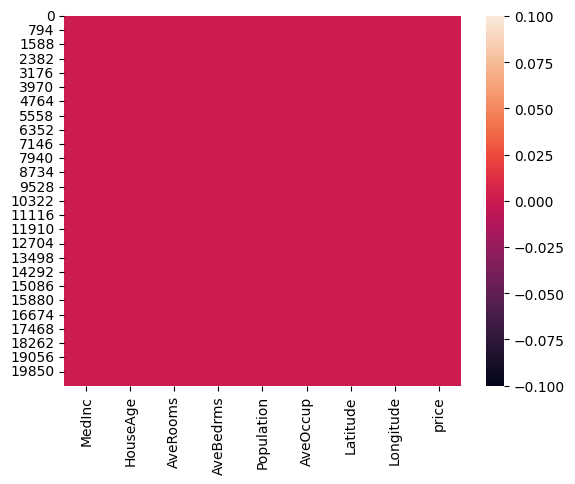

In [14]:
#another way to check if there are any null values
sns.heatmap(df.isnull())

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
#Correlation in machine learning refers to the statistical measure that expresses the extent to which two variables change together. It helps in understanding the relationship between features in a dataset, which can be crucial for model building and feature selection.
correlation = df.corr()

<Axes: >

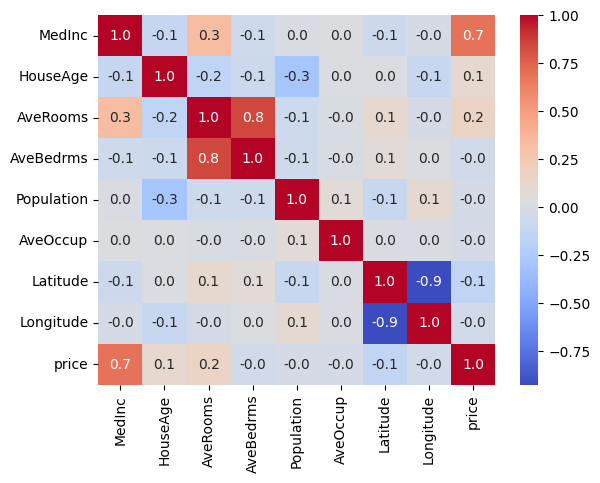

In [17]:
#annot = numbers in the boxes, cmap = colour, cbar = side bar, fmt = decimal format)
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True, fmt ='.1f')

## Splitting data 

In [18]:
#X contains all the features ie independent variables and Y contains the target variable ie dependent variables
#X in the input and Y is the output in some way
X= df.drop(['price'], axis=1)
Y= df['price']

In [19]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [20]:
X,Y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [22]:
X_train.shape

(18576, 8)

In [23]:
X_test.shape

(2064, 8)

In [24]:
#the output shows that Y_train and Y_test are 1D arrays
Y_train.shape

(18576,)

In [25]:
Y_test.shape

(2064,)

## Training Model

In [26]:
model = LinearRegression()

In [27]:
#training the training part of our dataset
#No Epochs: Since linear regression finds the best-fitting line using mathematical optimization techniques (like the Normal Equation), it does not require multiple passes (epochs) through the training data. It converges to the optimal solution directly.
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
model.coef_

array([ 4.41234614e-01,  9.33958687e-03, -1.11881257e-01,  6.35566324e-01,
       -5.55460288e-06, -3.63942002e-03, -4.13791911e-01, -4.26498569e-01])

In [42]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['coef'])
coef

,coef
MedInc,0.441235
HouseAge,0.009340
AveRooms,-0.111881
AveBedrms,0.635566
Population,-0.000006
AveOccup,-0.003639
Latitude,-0.413792
Longitude,-0.426499


In [29]:
#testing the data on training set for now
# pred is the y hat value for the training set
pred=model.predict(X_train)

In [30]:
print("pred shape:", pred.shape)  # Should be (18576,)


pred shape: (18576,)


In [31]:
pred

array([2.80994195, 2.04416067, 1.48496895, ..., 1.53463222, 1.78670003,
       1.2199845 ])

### Evaluation for the training data only

In [32]:
score1 = metrics.mean_absolute_error(Y_train, pred)
score2 = metrics.mean_squared_error(Y_train, pred)
score3 = np.sqrt(metrics.mean_squared_error(Y_train, pred))

print(score1)
print(score2)
print(score3)

0.5303131076884307
0.5222672378593191
0.7226805918656728


In [33]:
score1
score2
score3

np.float64(0.7226805918656728)

Text(0, 0.5, 'predicted price :')

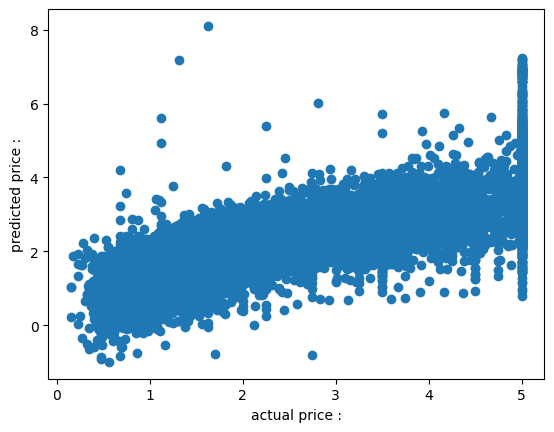

In [34]:
plt.scatter(Y_train, pred)
plt.xlabel("actual price :")
plt.ylabel("predicted price :")

## Evaluation on testing data

In [35]:
test_pred = model.predict (X_test)

In [36]:
test_pred

array([2.81424673, 1.25006917, 1.45367217, ..., 3.14362113, 2.37874928,
       1.42452394])

In [37]:
score1 = metrics.mean_absolute_error(Y_test, test_pred)
score2 = metrics.mean_squared_error(Y_test, test_pred)
score3 = np.sqrt(metrics.mean_squared_error(Y_test, test_pred))

print(score1)   
print(score2)
print(score3)

0.5415616522650648
0.545079894713578
0.73829526255664


Text(0, 0.5, 'predicted price :')

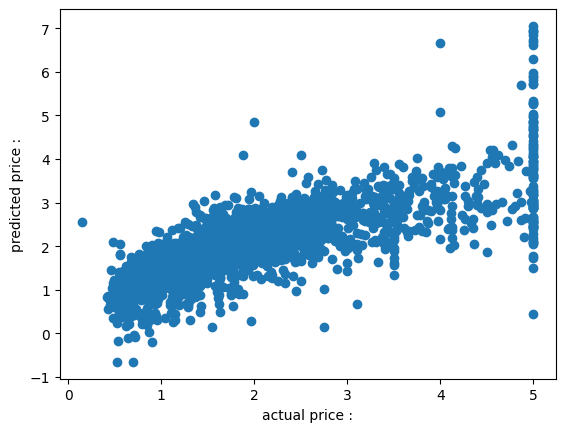

In [46]:
plt.scatter(Y_test, test_pred)
plt.xlabel("actual price :")
plt.ylabel("predicted price :")

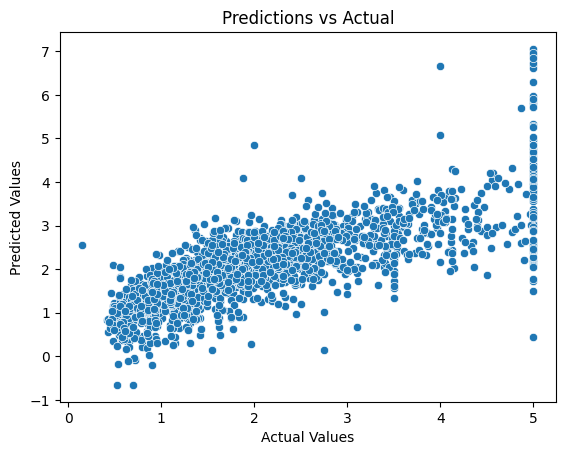

In [47]:
sns.scatterplot(x=Y_test, y=test_pred) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual')
plt.show()

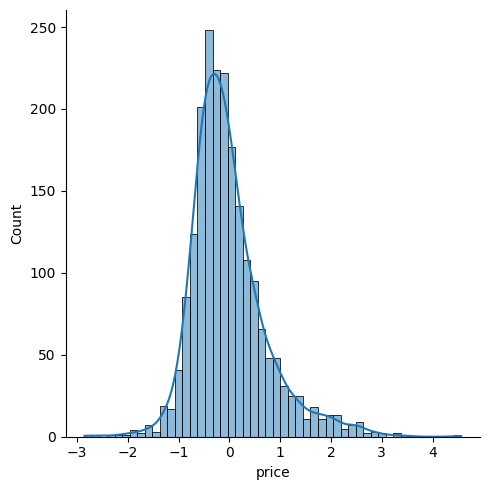

In [43]:
sns.displot(Y_test - test_pred, bins=50, kde=True)

# COMPLETED PRACTISE 1